In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import constants, os, Plotting

In [2]:
folder = '/data2/gsampsonolalde/LEAPS-2024/Analysis/{}'
# folder='C:\GINA\Documentos\LEAPS-2024\Analysis\{}'
nameBase= folder.format('TimePlots/')

physical = {constants.SHOCK: ['Density', 'gasTemp', 'av', 'zeta', 'radfield', constants.SHOCKVEL],
            constants.HOTCORE: ['Density', 'gasTemp', 'av', 'zeta', 'radfield'],
            constants.BOTH: ['Density', 'gasTemp', 'av', 'zeta', 'radfield', constants.SHOCKVEL],}
species=['#CH3OH', 'CH3OH', '#SIO', 'SIO']

In [3]:
df=Plotting.buildDataframe([constants.HOTCORE, constants.SHOCK], folder, physical, species, singleDf=False)
df['normalizedTime']= df['Time']/df.groupby('runName')['Time'].transform('max')
nDf=Plotting.localAbundanceDataframe(df, species, physical, constants.BOTH, constants.ALL, singleDf=False)
nDf['normalizedTime_log']= np.log10(nDf['normalizedTime'])

/data2/gsampsonolalde/uclchem_osx/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0.98, 'Time Evolution: SIO')

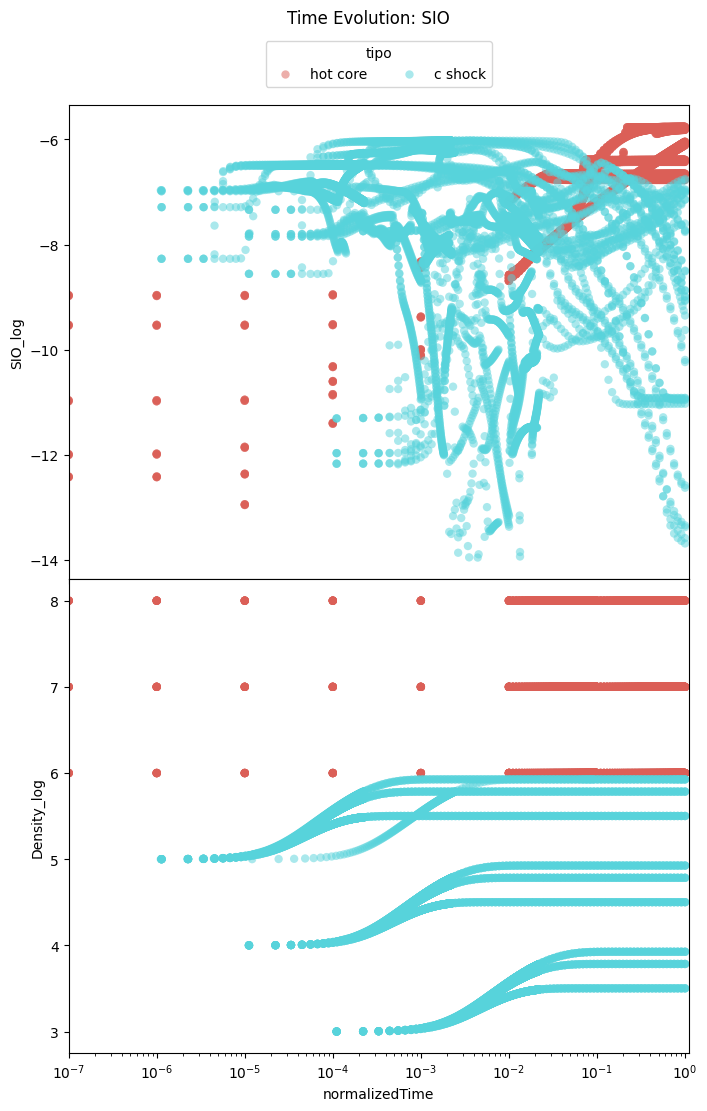

In [96]:
fig, axs = plt.subplots(2, figsize=(8, 12), sharex=True)
fig.subplots_adjust(top=0.9,wspace=0.5, hspace=0)
fig.suptitle(f"Time Evolution: {'SIO'}", size='large')

sns.scatterplot(df, x="normalizedTime", y='SIO'+"_log",
                linewidth=0, alpha=0.5, ax=axs[0], 
                hue='tipo', palette='hls')
sns.scatterplot(df, x="normalizedTime", y="Density"+"_log",
                linewidth=0, alpha=0.5, ax=axs[1], legend=None,
                hue='tipo', palette='hls')
axs[0].set_xscale('log')
axs[0].set_xlim(left=1e-7, right=1.1)
sns.move_legend(axs[0], "upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)

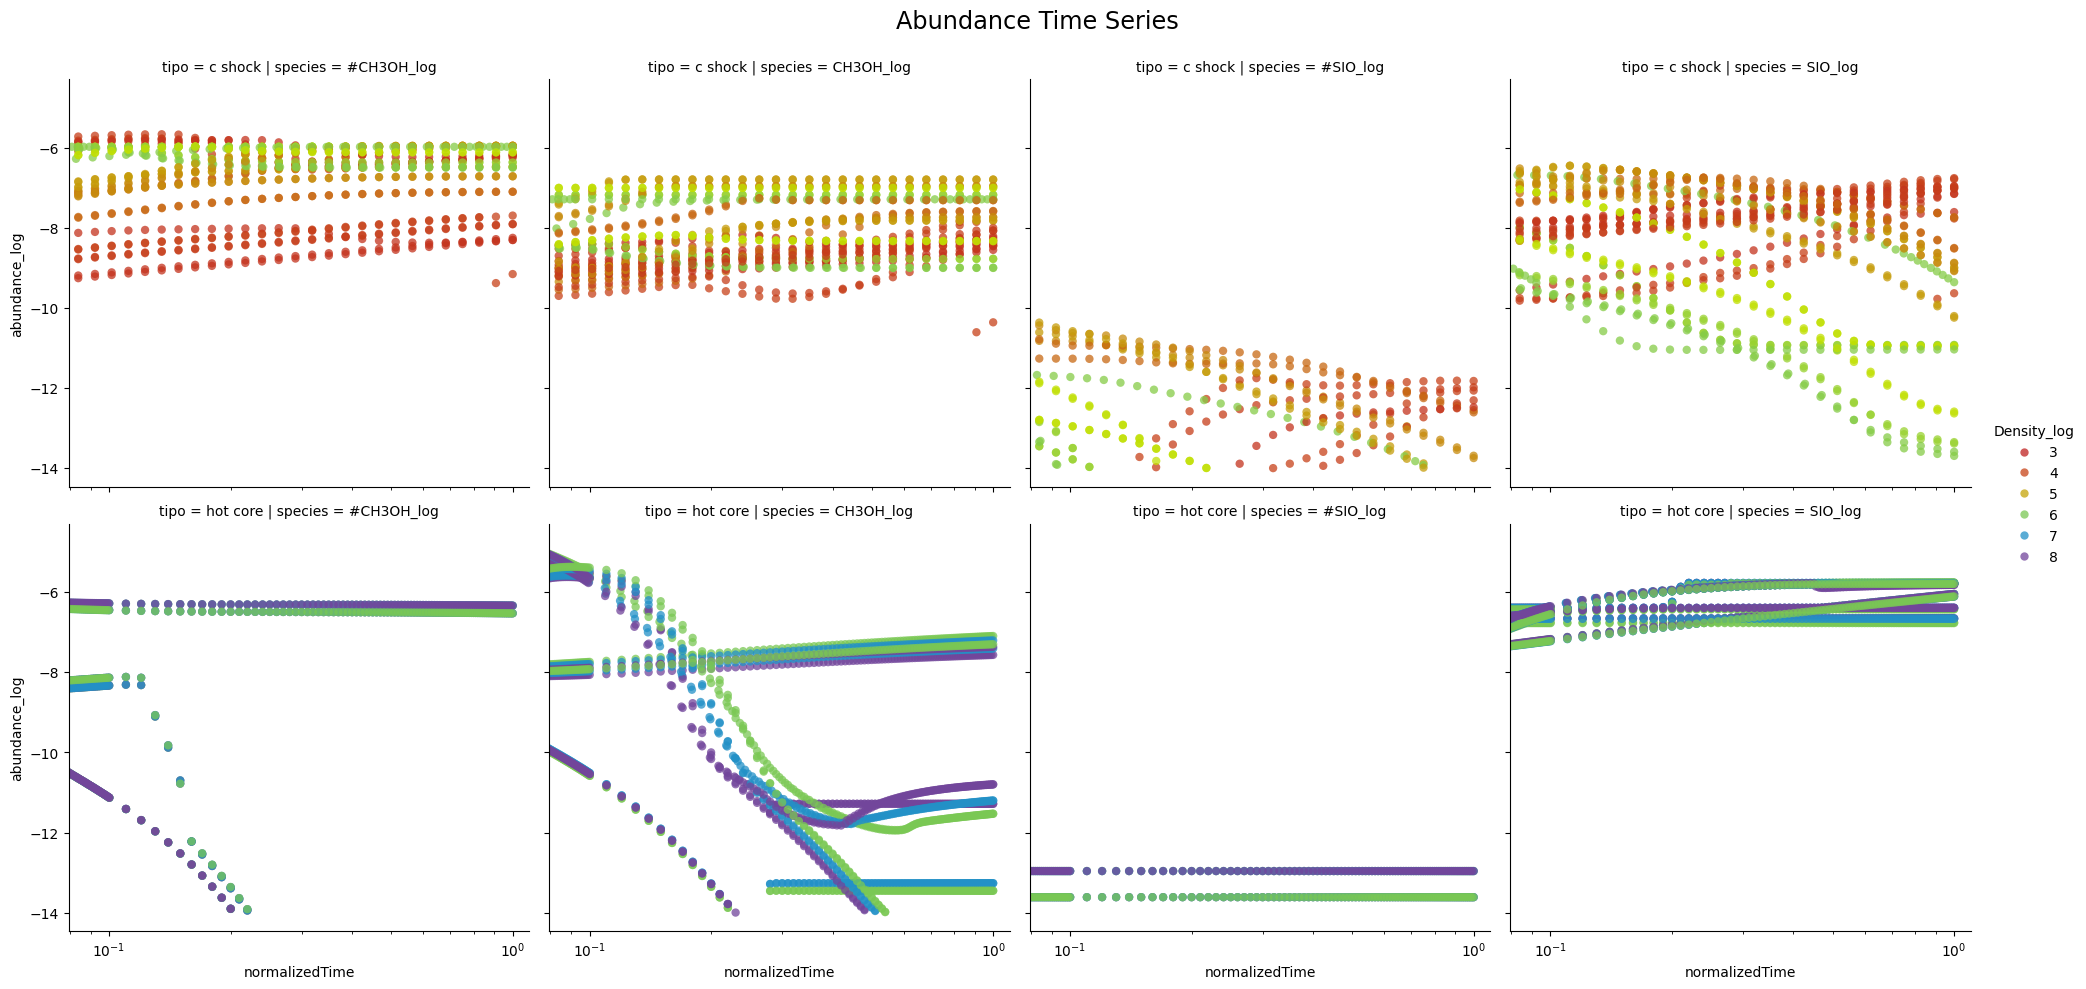

In [53]:
cmp=sns.blend_palette(['#c02321','#ca4c16','#c2e000','#0fa4d2','#72469b'],as_cmap=True)
g = sns.relplot(nDf, x="normalizedTime", y="abundance_log",
                linewidth=0, alpha=0.75,
                hue='Density'+'_log', palette=cmp,
                row="tipo",  col="species", row_order=[constants.SHOCK,constants.HOTCORE],
                )
g.set(xscale='log', xlim=(None,1.1))
g.figure.suptitle('Abundance Time Series', size='xx-large')
g.figure.subplots_adjust(top=0.91)

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(8,8))
fig.subplots_adjust(top=0.93)

for i, spec in enumerate([sp+'_log' for sp in species]):
    for j, tipo in enumerate(physical.keys()):
        ax=axs[i][j]
        ax=sns.scatterplot(df, x='Time_log', y=spec, 
                        hue= 'tipo',
                        linewidth=0, alpha=0.5, ax=ax)
        ax.set_xlim(left=0.0, right=6.1)
        sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)

fig.suptitle('Abundances')

# Shock

In [3]:
tipo=constants.SHOCK
df= Plotting.buildDataframe(tipo, folder, physical, species)
df['normalizedTime']= df['Time']/df.groupby('runName')['Time'].transform('max')
dfFinal= Plotting.localAbundanceDataframe(df, [f'{prop}_log' for prop in species], physical, tipo)

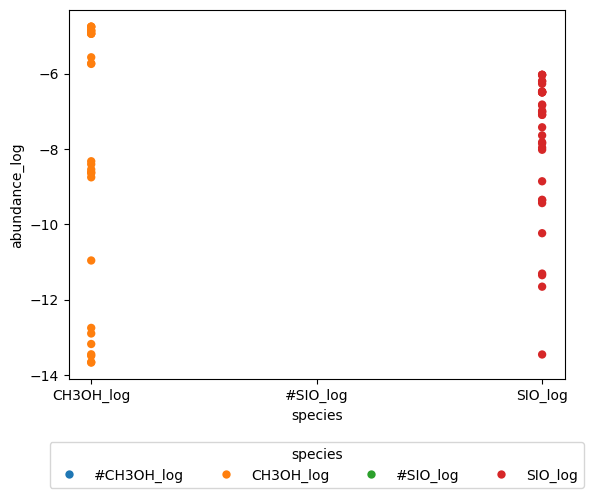

In [8]:
ax=sns.scatterplot(dfFinal, x='species', y='abundance_log',
                hue='species',
                linewidth=0,
                )
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)

# Hot core

In [ ]:
tipo=constants.HOTCORE
df= Plotting.buildDataframe(tipo, folder, physical, species)
df['normalizedTime']= df['Time']/df.groupby('runName')['Time'].transform('max')
dfFinal= Plotting.localAbundanceDataframe(df, [prop+'_log' for prop in species])

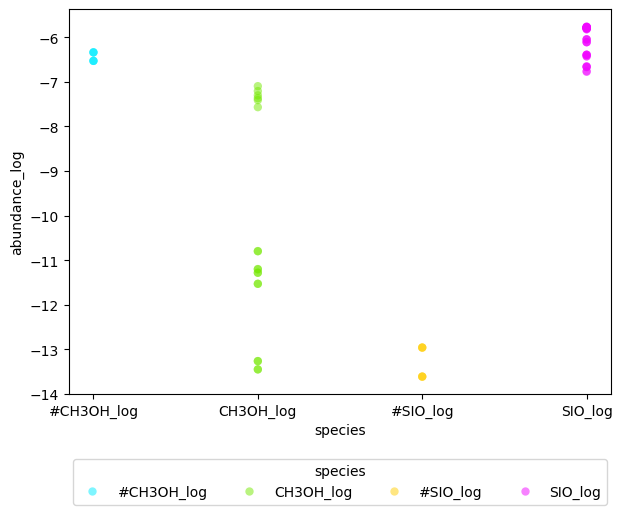

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(dfFinal, y='abundance_log', x='species',
             hue='species', palette='gist_ncar',
             linewidth=0, ax=ax, alpha=0.5,
             )
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#         verticalalignment='center', transform=ax.transAxes)